In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Load image (grayscale for simplicity)
img_path = os.path.join("..", "data", "task_03", "image_03.jpg")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

In [3]:
# Helper function to rotate image around its center
def rotate_image(image, angle):
    h, w = image.shape
    center = (w // 2, h // 2)
    
    # Compute rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    
    # Compute the new bounding dimensions of the image
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))
    
    # Adjust the rotation matrix to take into account translation
    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]
    
    # Rotate the image
    rotated = cv2.warpAffine(image, M, (new_w, new_h), borderValue=255)
    return rotated

In [4]:
# Rotate images
rotated_45 = rotate_image(img, -45)
rotated_90 = rotate_image(img, -90)

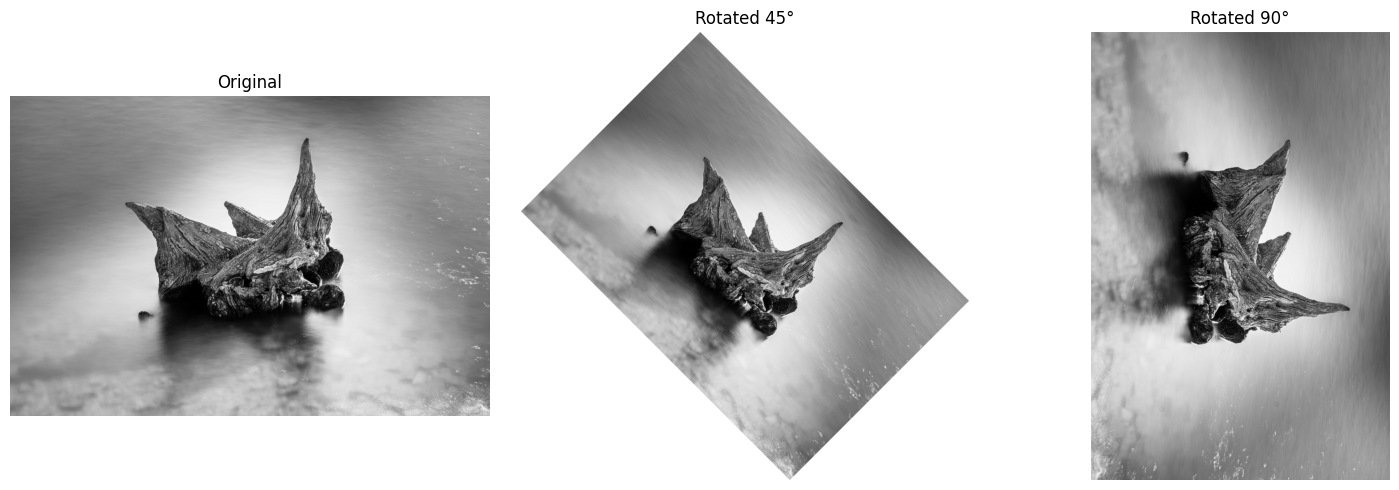

In [5]:
# Display results
plt.figure(figsize=(15, 5))
titles = ['Original', 'Rotated 45°', 'Rotated 90°']
images = [img, rotated_45, rotated_90]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
#Save outputs to results
result_dir = os.path.join("..", "results", "task_03")
os.makedirs(result_dir, exist_ok=True)

cv2.imwrite(os.path.join(result_dir, "rotated_45.jpg"), rotated_45)
cv2.imwrite(os.path.join(result_dir, "rotated_90.jpg"), rotated_90)

True